## 경사 하강법

- 학습이란 훈련데이터로부터 계산되는 오차함수 **E(w)**를 신경망의 파라미터에 대해 최소화하는 과정이다

### $$ D = \{(x_1, \mathbf{d}_1), ..., (x_n, \mathbf{d}_n) \} $$

- 학습의 목표는 선택한 $E(\mathbf{w})$에 대하여 최소값을 주는 $w = argmin_w E(\mathbf{w})$를 구하는 것이다.
- 그러나 $E(\mathbf{w})$는 convext 함수가 아니므로 전역 극소점(global minimum)을 직접 구하는 것은 통상적으로 불가능하다. 이에 지역 극소점(local minimum)을 구한다. 
- 이 지역 극소점을 구하는 가장 간단한 방법이 **경사 하강법(gradient descent method)**이다. 
- 기울기(그래디언트, gradient)란 벡터의 기울기로 다음과 같다. [벡터의 기울기](https://wikidocs.net/6998)

### $$ \nabla{E} \equiv \frac{\partial{E}}{\partial{\textbf{w}}} = \begin{bmatrix} \frac{\partial{E}}{\partial{w_1}} & \dots & \frac{\partial{E}}{\partial{w_M}}\end{bmatrix}^\top $$

- 경사하강법은 현재의 **w**를 음의 기울기 방향 ($-\nabla{E}$)으로 조금씩 움직이는 것을 여러 번 반복한다.
- 현재의 가중치 $\textbf{w}_{(t)}$를, 하강한 이후의 가중치를 $\textbf{w}_{(t+1)}$일 때, 다음과 같이 갱신한다. (여기서, $\epsilon$는 학습률)

###  $$ \textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \epsilon\nabla{E} $$


- 경사 하강법의 단순한 구현 예

In [ ]:
def gradient_descent(f, init_w, learning_rate=0.01, step_num=100):
    w = init_w
    
    for i in step_num:
        grad = gradient(f, w) # 1차 미분에 의한 기울기
        w += -learning_rate*grad
    
    return w

- 함수 $ f = x^2 + y^2 $의 기울기 벡터를 그려보자.

In [1]:
%matplotlib inline

In [2]:
import numpy as np

f = lambda x, y: x**2 + y**2

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2

x, y = np.meshgrid(
    np.arange(xmin, xmax + xstep, xstep),
    np.arange(ymin, ymax + ystep, ystep)
)
z = f(x, y)

함수 $f$의 전역 극소점 $ min\{x^2 + y^2\}$은 $0$ 이고 그 좌표 $(x, y)$는 $(0, 0)$ 이다. 

In [3]:
minima = np.array([0., 0.])
f(*minima)

0.0

In [4]:
minima_ = minima.reshape(-1, 1)
minima_

array([[ 0.],
       [ 0.]])

In [5]:
f(*minima_)

array([ 0.])

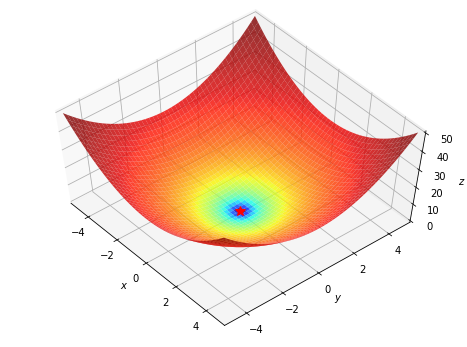

In [7]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

flg = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d', elev=60, azim=-40)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

- 비선형 함수를 최소화하는 방법 중에서 경사 하강법이 가장 단순한 방법이다.
- 목적 함수의 2차 미분을 이용하는 뉴턴법 등이 있으나 수렴이 느리다.
- 학습률 $\epsilon$을 결정하는 것이 학습을 크게 좌우하므로 뉴턴법이나 그 파생법(quasi-newton)을 사용할 수 있다면 굳이 경사 하강법을 쓸 이유는 없다.
- 딥 뉴럴넷처럼 문제의 크기가 큰 경우, 목적함수의 2차 함수에 대한 계산이 어려우므로 (1차 미분만 겨우 계산), 경사 하강법이 유효한 방법이다.

## 확률적 경사 하강법

- 지금까지 모든 훈련 샘플 $n = 1, ..., N$에 대하여 계산되는 오차함수 $E(\textbf{w})$를 최적화하는 것을 다루었다. (ex. 손글씨 mnist에서는 N=60000)
- 회귀와 클래스 분류 어느 쪽이든 E(\textbf{w})는 각 샘플 한개에 대해서만 계산되는 오차 $E_n$의 합으로 주어진다. 이를 배치학습이라 부른다.

### $$ E(\textbf{w}) = \sum_{n=1}^{N}E_n(\textbf{w}) $$

- 이와 대조적으로 샘플의 일부만을 사용하여 파라미터를 업데이트하는 방법이 있다. 이를 **SGD, 확률적 경사 하강법(stochastic gradient descent)**라고 한다. (또는 **순차적 경사 하강법(sequential gradient descent)**)
- 다음과 같이 하나의 샘플 $n$에 대해 계산한 오차함수 $E_n(\textbf{w})$의 기울기 $\nabla{E_n}$을 계산한다.

###  $$ \textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \epsilon\nabla{E_n} $$

- 딥 뉴럴넷에서는 배치 형태의 경사 하강법보다 확률적 경사 하강법이 더 많이 쓰인다. 
  - 데이터가 2배로 커지면 계산량도 2배로 커지는 배치학습과 달리, 계산량이 일정하므로 학습이 빠르다.
  - $E(\textbf{w})$가 동일한 배치학습과 달리, 목적함수를 업데이트할 때마다 $\textbf{w}$가 달라지므로 지역 국소점에 갇힐 위험이 적다.
  - 반복할 때마다 무작위로 샘플을 선택하면 그 효과를 최대화할 수 있다.
  - 학습 데이터의 수집과 최적화가 동시에 진행될 수 있다.  

In [ ]:
def stochastic_gradient_descent(f, init_w, learning_rate=0.01, step_num=100, data_size=1):
    w = init_w
    
    for i in step_num:
        grad = gradient(f, w, data_size) # 전체가 아닌 일부에 해당하는 데이터에 대한 기울기를 구한다.  
        w += -learning_rate*grad
    
    return w

## 미니배치

- 큰 신경망에서는 복수의 샘플을 묶어 가중치를 업데이트하는데, 이를 미니배치라고 부른다.
- 하나의 미니배치를 $\mathcal{D}_t$라고 할 때, $t$번째 마다 샘플 집합이 달라지고, 이 샘플 집합에 대한 오차의 기울기 방향으로 가중치를 업데이트한다. 그리고 샘플의 개수만큼 $N_t$로 정규화한다.
### $$ E_t(\textbf{w}) = \frac{1}{N_t}\sum_{n\in\mathcal{D}_t}E_n(\textbf{w}) $$

- 보통 10 ~ 100개 샘플 전후로 결정하는 경우가 많다. 
- 클래스 분류에서는 미니배치 간의 일정한 가중치값을 유지하기 위해 각 클래스 샘플을 하나 이상 삽입한다.
- 클래스 수가 10 ~ 100개 정도이면서 클래스 출현 빈도가 같을 때는 분류하려는 클래스 수와 같은 크기의 미니배치를 생성한다.
- 미니배치를 N개 늘려도 학습률을 N배만큼 늘어나지 않는다. (전체 계산속도만 느려진다.)

## 일반화 성능과 오버피팅
- 훈련 데이터에 대한 오차를 **훈련 오차(training error)**라고 부른다.
- 테스트 데이터에 대한 오차(정확히는 오차에 대한 기대값)을 **일반화 오차(generalization error)** 또는 **테스트 오차**라고 부른다.
- 훈련 오차와 테스트 오차가 차이나는 것을 **오버피팅(overfitting)**이라고 부른다.
- 테스트 오차가 증가할 경우, 학습을 종료한다. 이를 **조기종료(early stopping)**이라고 부른다. 
- 이 테스트 오차를 줄이기 위해, 신경망 레이어 수, 유닛 수, 또는 학습률 등의 하이퍼 파라미터는 조절하는 꼼수를 부린다.

### 규제화
- 학습시에 가중치의 자유도를 제약하는 것을 **규제화(regularization)**라고 한다.
- 규제화 종류에 따른 손글씨 인식 정확도 비교는 다음과 같다. 

|종류                 | 오차(%)  | 
|:-------------------|:--------:|
|가중치 감쇠           | 1.62    |
|가중치 상한           | 1.36    |
|드롭아웃 + 가중치 감쇠  | 1.25    |
|드롭아웃 + 가중치 상한  | 1.05    |

### 가중치 감쇠 (weight decay)
- 오차함수에 가중치의 제곱합을 더하는 방법이다. 

### $$ E_t(\textbf{w}) \equiv \frac{1}{N_t}\sum_{n\in{\mathcal{D}_t}}E_n(\textbf{w}) + \frac{\lambda}{2}\|\textbf{w}\|^2 $$

- 규제화 강도를 제어하는 파라미터로 일반적으로 0.01 ~ 0.00001 의 값을 선택한다. 
- 이 적용한 경사하강법의 업데이트 식은 다음과 같다. 가중치 벡터의 기울기를 모두 더해, 미니배치 샘플의 개수 $N_t$만큼 나누고, 자신의 크기만큼 감쇠하도록 업데이트 된다.


###  $$ \textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \epsilon \lgroup \frac{1}{N_t}\sum\nabla{E_n} + \lambda\textbf{w}^{(t)} \rgroup $$

- 가중치 감쇠는 신경망 가중치 $\textbf{W}^{(l)}$ 에만 적용하고, 바이어스 $\textbf{b}^{(l)}$에는 적용하지 않는다.  

### 가중치 상한
- $l$층의 유닛 $j$가 $l-1$층의 유닛 $i=1,...,I$까지 신호를 받을 때 가중치 $w_ji$는 다음의 조건을 만족해야 한다. 
- 만족하지 않으면, $w_{j1}, ..., w_{jI}$에 미리 정한 상수 $c$ (단, $c$ < 1)를 곱하여 만족케 한다.

### $$ \sum_{i}{w_{ji}}^2 < c $$